In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scapy import *
from sources import *
import seaborn as sns
from __future__ import unicode_literals

sns.set(style="whitegrid")

### Información por simbolo y Entropia de la Fuente S1

In [2]:
# Create sources

# Load pcaps
paths = []
paths += ['../data/buenos/captures_juab.pcap']
paths += ['../data/buenos/starbucks_juramento1.pcap']
paths += ['../data/buenos/ethernet_capture.pcap']
paths += ['../data/buenos/wired_lan.pcap']

# Create sources
S1_list = []
for path in paths:
    packets = sniff(offline=path)
    S1 = create_S1_source(packets) 
    S1_list.append(S1)

In [119]:
def plot_info_y_probas_S1(source):
    entropia_S1 = entropy(source)
    entropia_maxima_S1 = max_entropy(source)
    
    fig, ax1 = plt.subplots(figsize=(11, 4))
    ax2 = ax1.twinx()

    bar_width = 0.4
    
#     ax1.set_xlabel('Símbolo',fontsize=15)
    ax1.set_ylabel('Probabilidad',fontsize=15)
    ax2.set_ylabel('Información [bits]',fontsize=15)
    ax2.grid()
    ax1.grid()
    
    # Probas
    proba = proba_por_simbolo(source)
    index, values = map(list, zip(*proba.items()))
    ax1.bar(index, values, bar_width, color='r',alpha=0.7,label='Probabilidad')

    # Infos
    informacion = informacion_por_simbolo(source)
    index, values = map(list, zip(*informacion.items()))
    ax2.bar(index, values, bar_width,  align='edge',color='b',alpha=0.7,label='Información')

    
    ax2.axhline(entropia_S1, color='k', label='Entropía')
    ax2.axhline(entropia_maxima_S1, color='g', label='Entropía máxima')
    
    ax2.legend(loc="upper right",frameon=True,fontsize=12)
    ax1.legend(loc=(0.05,0.85),frameon=True,fontsize=12)
    
    fig.tight_layout()


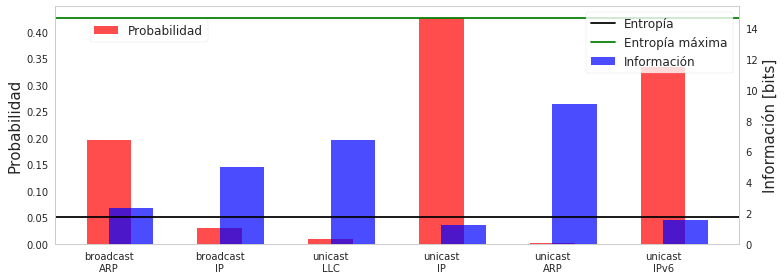

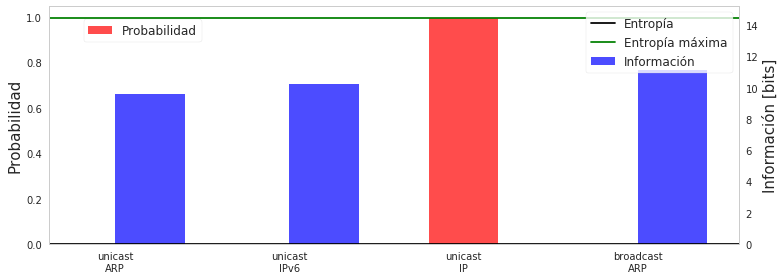

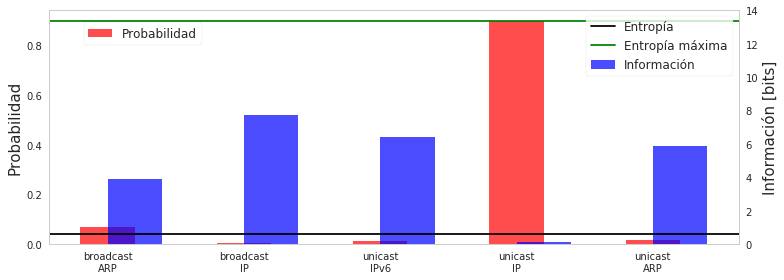

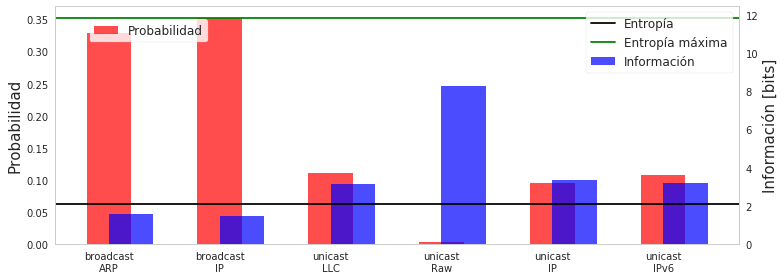

In [120]:
plots_root = '../exp/plots/'
plots_root_informe = '../../tdc-tp1-informe/plots/'

for i in range(len(S1_list)):
    S2 = S1_list[i]
    plot_info_y_probas_S1(S2)
    plt.savefig(plots_root+'infoS1_'+str(i+1)+'.pdf')
    plt.savefig(plots_root_informe+'infoS1_'+str(i+1)+'.pdf')